https://people.duke.edu/~rnau/arimrule.htm
setting up arima models

In [1]:
import pandas as pd
import pyflux as pf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'../../data/cases/CA_JHU_cases.csv')
df.head()

,date,California.JHU_ConfirmedCases.data,California.JHU_ConfirmedCases.missing,California.JHU_ConfirmedDeaths.data,California.JHU_ConfirmedDeaths.missing,California.JHU_ConfirmedRecoveries.data,California.JHU_ConfirmedRecoveries.missing
0,2020-01-01,0.0,5700.0,0.0,5700.0,0.0,11500.0
1,2020-01-02,0.0,5700.0,0.0,5700.0,0.0,11500.0
2,2020-01-03,0.0,5700.0,0.0,5700.0,0.0,11500.0
3,2020-01-04,0.0,5700.0,0.0,5700.0,0.0,11500.0
4,2020-01-05,0.0,5700.0,0.0,5700.0,0.0,11500.0


In [3]:
cases = df[['date', 'California.JHU_ConfirmedCases.data']]
cases.head()

,date,California.JHU_ConfirmedCases.data
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0


## Try an ARIMA model

In [4]:
#ARIMA(p=4,d=0,q=4)
#Look at various families here https://pyflux.readthedocs.io/en/latest/families.html
arima = pf.ARIMA(data=cases, target='California.JHU_ConfirmedCases.data', ar=4, integ=1, ma=0, family=pf.Normal())
x = arima.fit('MLE')
x.summary()

Normal ARIMA(4,1,0)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced California.JHU_Confirme Method: MLE                                       
Start Date: 4                                           Log Likelihood: -2965.9507                        
End Date: 301                                           AIC: 5943.9015                                    
Number of observations: 297                             BIC: 5966.0639                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 6213.4998  1181.5353  5.2588   0.0      (3897.6907 | 8529.3089)  
AR(1)                                

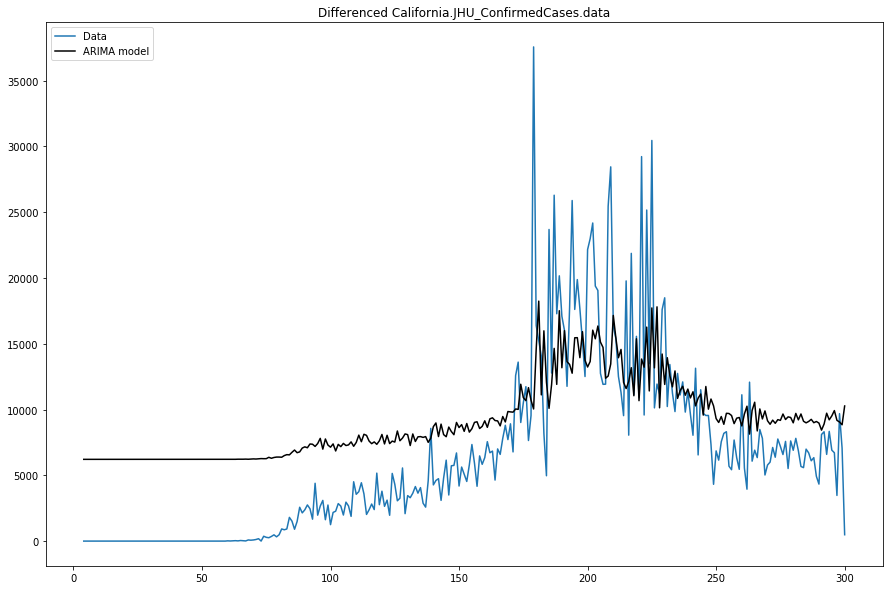

In [5]:
arima.plot_fit(figsize=(15,10))

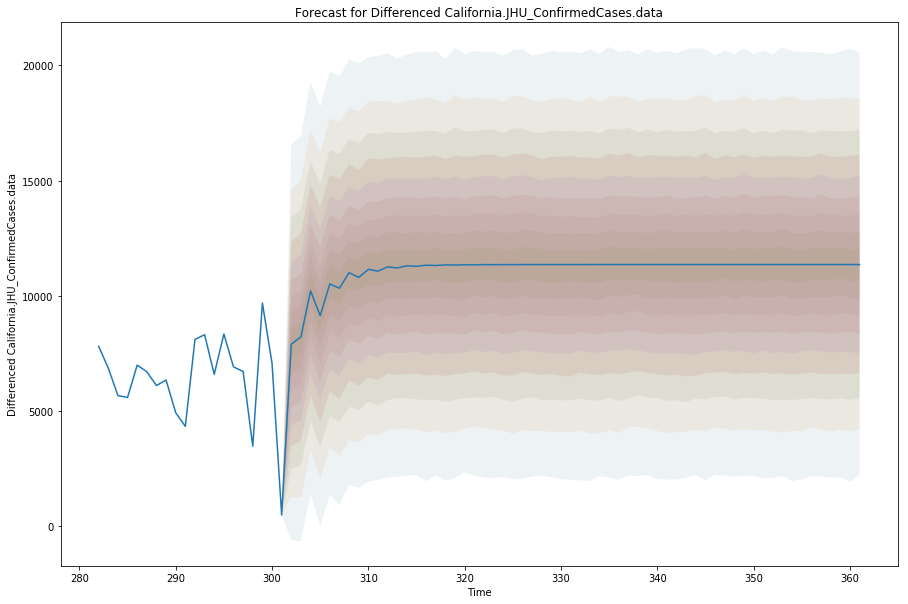

In [6]:
arima.plot_predict(h=60, figsize=(15,10))

In [7]:
arima.predict(h=30)

,Differenced California.JHU_ConfirmedCases.data
302,7896.317560
303,8217.285061
304,10213.640406
305,9138.051351
306,10513.271872
307,10327.757950
308,11001.422038
309,10799.078453
310,11147.043720
311,11069.417483


In [9]:
arima.predict_is(h=30,fit_once=False, fit_method='MLE')

,Differenced Series
272,9012.346671
273,9339.720382
274,6127.261712
275,9377.285219
276,9320.644792
277,9824.278547
278,9373.562454
279,9584.972661
280,9522.672903
281,9096.193630
